# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
import numpy as np
import pandas as pd

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [ ]:
feature_data=dataset.data

In [ ]:
target_data=dataset.target
target_feature_names=dataset.feature_names

In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
df = pd.DataFrame(data=feature_data, columns=target_feature_names)
df['target'] = target_data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
print("the total feature in this dataset is ",dataset.feature_names.size)
print("the observations have a 'mean area' of greater than 700 is ", np.sum(df['mean area']>700))
print("the number of Malignant is ", np.sum(target_data==0))
print("the number of Benign is ",np.sum(target_data==1))

the total feature in this dataset is  30
the observations have a 'mean area' of greater than 700 is  171
the number of Malignant is  212
the number of Benign is  357


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)

0 is malignant and 1 is benign


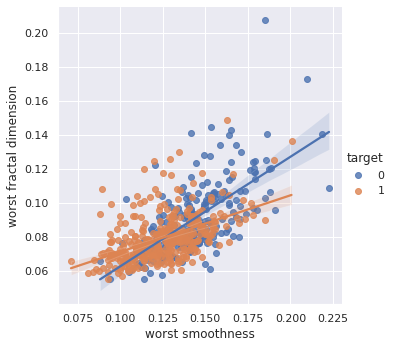

In [ ]:
g = sns.lmplot(x="worst smoothness",y="worst fractal dimension",hue="target",data=df)
print("0 is malignant and 1 is benign")

0 is malignant and 1 is benign


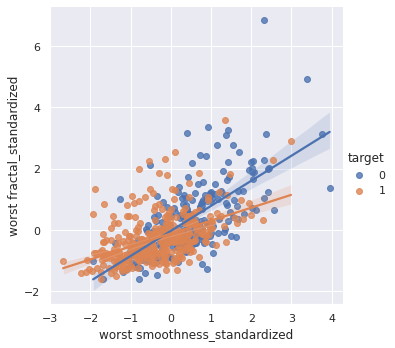

In [ ]:
df["worst fractal_standardized"] = (df["worst fractal dimension"]-df["worst fractal dimension"].mean())/df["worst fractal dimension"].std()
df["worst smoothness_standardized"] = (df["worst smoothness"]-df["worst smoothness"].mean())/df["worst smoothness"].std()
k = sns.lmplot(x="worst smoothness_standardized",y="worst fractal_standardized",hue="target",data=df)
print("0 is malignant and 1 is benign")


In [ ]:
print("The graph before and after standardization is the same. The advantage of standardization is that the x-axis and y-axis can scale to the uniform format")

The graph before and after standardization is the same. The advantage of standardization is that the x-axis and y-axis can scale to the uniform format


## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]** see below
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]** best k is 10 and accuracy is 0.93465
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]** see comment below




In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt

In [ ]:
meantest_for_each_k = np.arange(100,dtype=float) #to store the score of mean for the test set
meantrain_for_each_k = np.arange(100,dtype=float) #to store the score of mean for the train set
for i in range (1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
  meantest_for_each_k[i-1]=scores['test_score'].mean()
  meantrain_for_each_k[i-1]=scores['train_score'].mean()

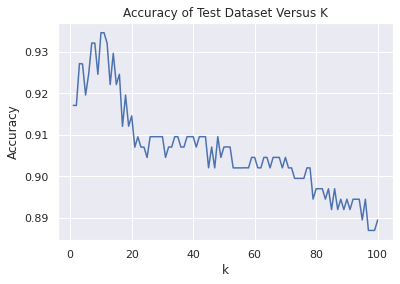

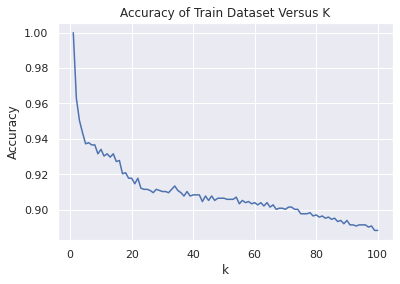

In [ ]:
k=range(1,101,1)
plt.plot(k, meantest_for_each_k)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy of Test Dataset Versus K")
plt.show()
plt.plot(k,meantrain_for_each_k)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy of Train Dataset Versus K")
plt.show()

Part 2. Q2

In [ ]:
print("the highest accuracy is ",max(meantest_for_each_k),"when k is equal to ",meantest_for_each_k.argmax()+1,"based on the test data curve")

the highest accuracy is  0.9346518987341772 when k is equal to  10 based on the test data curve


Part 2. Q3

Comment on the curve: when the k is larger than 10, both validation and training curve are declining. Therefore, 10 is the sweet spot and if k is less than 10 then it is overfit. Underfit for over than 10

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
def Feature_selector(X_train1,y_train,tr=0.95):
  numberoffeature=30                                #assignment array
  j=0
  listofRemoveFeature=[]
  listofbestK=np.zeros(30,dtype=int)                
  listofbestAccuracy=np.zeros(30,dtype=float) 
  updatecols=target_feature_names
  while numberoffeature>1: 
   dt=tree.DecisionTreeClassifier()      #code for decision tree
   dt.fit(X_train1,y_train)               
   importance = dt.feature_importances_   #code for decision tree
   dfnew=pd.DataFrame(importance,updatecols,columns=['importance']) #create the new data frame to sort the importance for each feature
   dfsorted=dfnew.sort_values(by='importance',ascending=True)                  #dfsorted is ascending order based on dfnew
   df_clean=pd.DataFrame(data=X_train1,columns=updatecols)          #create a dataframe called df_clean to drop columns of feature
   feature_toremove=dfsorted.index[0]                            #extract the name of the removed feature 
   df_clean=df_clean.drop(columns=feature_toremove)         #remove the feature data as per the name of the removed feature
   updatecols=df_clean.columns.values                       #update the columns after removing features
   listofRemoveFeature.append(feature_toremove)   #store the name of features
   X_train1=df_clean.values                   #extract the X_train1 from removed DF for KNN CV training, y_train remain the same
   meantest1_for_each_k = np.arange(100,dtype=float) #to store the score of mean for the test set
   meantrain1_for_each_k = np.arange(100,dtype=float) #to store the score of mean for the train set
   for i in range (1,101):
     knn1 = neighbors.KNeighborsClassifier(n_neighbors=i)
     scores1 = cross_validate(knn1, X_train1, y_train, cv=5,return_train_score=True)
     meantest1_for_each_k[i-1]=scores1['test_score'].mean()
     meantrain1_for_each_k[i-1]=scores1['train_score'].mean()
     bestK=meantest1_for_each_k.argmax()+1             #copy the way of finding best K and Accuracy from Part two
     bestAccuracy=max(meantest1_for_each_k)
   listofbestK[j]=bestK
   listofbestAccuracy[j]=bestAccuracy
   j=j+1
   numberoffeature=numberoffeature-1
   if bestAccuracy<tr*0.93465:
    break
  return listofbestAccuracy,listofbestK,listofRemoveFeature

In [ ]:
from sklearn import tree
X_train1=X_train                           #copy the X_train to X_train1 to protect the original data. X_train1 is the subject to update      #create array to store Accuracy                             

In [ ]:
#test if the call function works and get the data 

info1,info2,info3=Feature_selector(X_train1,y_train,tr=0.95)
print(info1,info2,info3)
#print(remove_feature)


[0.9346519  0.9346519  0.9346519  0.9321519  0.91458861 0.91458861
 0.91458861 0.91458861 0.91458861 0.91458861 0.92968354 0.92968354
 0.92968354 0.92968354 0.92968354 0.92968354 0.92968354 0.92968354
 0.90449367 0.90205696 0.90205696 0.90205696 0.90205696 0.90205696
 0.90205696 0.89936709 0.89936709 0.91205696 0.92462025 0.        ] [10 10 10  7 34 34 34 34 34 34 20 20 20 20 20 20 20 20  1  5  5  5  5  5
  5  3  3 38 34  0] ['mean radius', 'worst fractal dimension', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'worst smoothness', 'mean fractal dimension', 'worst area', 'radius error', 'texture error', 'symmetry error', 'perimeter error', 'compactness error', 'concavity error', 'fractal dimension error', 'worst perimeter', 'worst compactness', 'smoothness error', 'mean concave points', 'concave points error', 'mean symmetry', 'worst concavity', 'worst texture', 'worst symmetry', 'area error', 'worst radius']


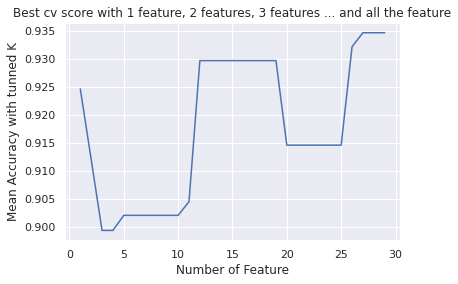

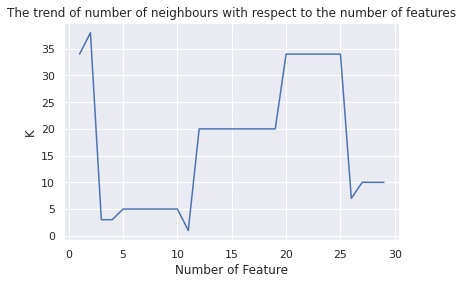

In [ ]:
infodrop1=np.delete(info1,29)
infodrop2=np.delete(info2,29)
howmanyfeatureremain=np.arange(29,0,-1)
plt.plot(howmanyfeatureremain,infodrop1)
plt.xlabel("Number of Feature")
plt.ylabel("Mean Accuracy with tunned K")
plt.title("Best cv score with 1 feature, 2 features, 3 features ... and all the feature")
plt.show()
plt.plot(howmanyfeatureremain,infodrop2)
plt.xlabel("Number of Feature")
plt.ylabel("K")
plt.title("The trend of number of neighbours with respect to the number of features")
plt.show()

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [ ]:
### standardi the raining and test data set ###
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [ ]:
### call the function ###

info4,info5,info6=Feature_selector(X_scaled_train,y_train,tr=0.95)
#print(remove_feature)


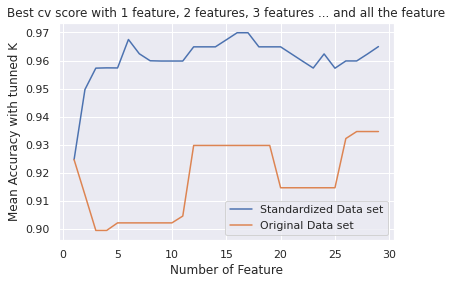

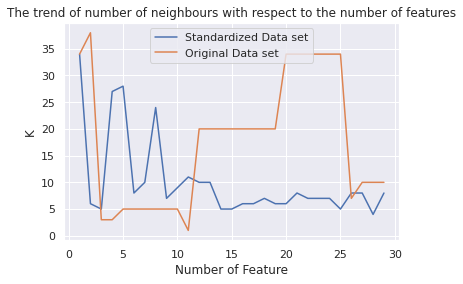

In [ ]:
infodrop4=np.delete(info4,29)
infodrop5=np.delete(info5,29)
howmanyfeatureremain=np.arange(29,0,-1)
plt.plot(howmanyfeatureremain,infodrop4,label='Standardized Data set')
plt.plot(howmanyfeatureremain,infodrop1,label='Original Data set')
plt.xlabel("Number of Feature")
plt.ylabel("Mean Accuracy with tunned K")
plt.title("Best cv score with 1 feature, 2 features, 3 features ... and all the feature")
plt.legend()
plt.show()
plt.plot(howmanyfeatureremain,infodrop5,label='Standardized Data set')
plt.plot(howmanyfeatureremain,infodrop2,label='Original Data set')
plt.xlabel("Number of Feature")
plt.ylabel("K")
plt.title("The trend of number of neighbours with respect to the number of features")
plt.legend()
plt.show()

Part 4 Q3. the standardization of the dataset helps the model and performance in two aspects : (1) As the number of features keeps remove, it drops significantly (though not reaching the stop criteria 0.95*Full features Accuracy) and diverges from a clear cuttof numbers of features (2)it brings the datasets to same scales to compare. Without standardzing, some coefficients for smaller scale data set will have larger coefficiency to comprise. Standardzation helps to remove this impacts, therefore, standardization dataset leads to better accuracy. 

In [ ]:
#find the best K and features removed

trial=info4.argmax()+1
trial
featureleft=30-trial
del info6[trial:]
kvalue=info5[trial-1]

In [ ]:
print("when in the ",trial,"trial")
print("the best K occurs and is equal to ",kvalue)
print("there are ",featureleft, "left")
print("features removed including ",info6)

when in the  13 trial
the best K occurs and is equal to  6
there are  17 left
features removed including  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'symmetry error', 'mean concave points', 'worst fractal dimension', 'mean fractal dimension', 'texture error', 'perimeter error']


## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [ ]:
df_final_train=pd.DataFrame(data=X_scaled_train,columns=target_feature_names)                                    
df_final_train=df_final_train.drop(columns=info6)         
df_final_train  
X_scaled_train_final=df_final_train.values


(398, 17)

In [ ]:
df_final_test=pd.DataFrame(data=X_scaled_test,columns=target_feature_names)                                    
df_final_test=df_final_test.drop(columns=info6)         
df_final_test
X_scaled_test_final=df_final_test.values
X_scaled_test_final.shape

(171, 17)

In [ ]:
from sklearn.metrics import accuracy_score
knn_final = neighbors.KNeighborsClassifier(n_neighbors=kvalue)
knn_final.fit(X_scaled_train_final, y_train)
accuracy = accuracy_score(y_test, knn_final.predict(X_scaled_test_final))
print ("Test set accuracy: ", accuracy * 100, "%")


Test set accuracy:  95.90643274853801 %


Q5. After removing the 17 features, standardization dataset and select k=6, the accuracy on the test data set is 95.9%

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/